In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import time

In [3]:
DATADIR = 'train/'
CATEGORIES = ['dog','cat']

train/dog
dog.8011.jpg


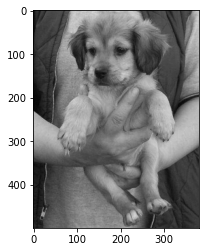

dog.7322.jpg


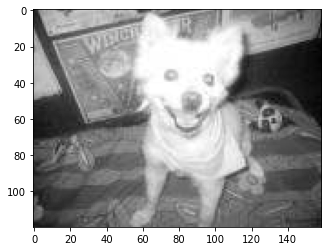

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dataset directory
    print(path)
    i = 0
    for img in os.listdir(path):
        print(img)
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if i == 1:
            break
        i += 1
    break

In [5]:
path

'train/dog'

In [6]:
print('Data Array:\n',img_array,'\n')
print('Data Shape:',img_array.shape)

Data Array:
 [[ 57  77  92 ... 124 118  99]
 [ 63  69  81 ... 116 115 103]
 [ 68  62  69 ... 109 115 108]
 ...
 [ 64  63  64 ...  64  66  77]
 [ 52  54  56 ...  57  61  70]
 [ 59  60  57 ...  65  71  76]] 

Data Shape: (120, 159)


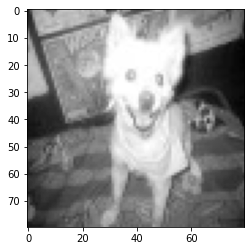

In [7]:
IMG_SIZE = 80
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
from tqdm import tqdm

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR, category)
        print(path)
        class_num = CATEGORIES.index(category) # categories for dog(0) and cat(1)
        for img in tqdm(os.listdir(path)):
            #print(img)
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()

  1%|          | 68/12500 [00:00<00:18, 676.97it/s]

train/dog


  1%|          | 75/12501 [00:00<00:16, 748.88it/s]

train/cat


100%|██████████| 12501/12501 [00:13<00:00, 914.61it/s]


In [10]:
random.shuffle(training_data)

# Check the shuffled data
for sample in training_data [:10]:
    print(sample[1])

0
1
0
1
1
1
0
0
0
0


In [14]:
X = [] # feature dataset
y = [] # label dataset

for features, label in training_data:
    X.append(features)
    y.append(label)

# Convert X to an array since you can't pass it to a neural network
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X[:1])

[[[[ 2]
   [ 2]
   [ 1]
   ...
   [ 2]
   [ 2]
   [ 2]]

  [[ 2]
   [ 2]
   [ 3]
   ...
   [ 4]
   [ 4]
   [ 2]]

  [[ 1]
   [ 3]
   [ 5]
   ...
   [ 6]
   [ 4]
   [ 2]]

  ...

  [[ 2]
   [ 2]
   [ 9]
   ...
   [13]
   [11]
   [ 5]]

  [[ 2]
   [ 2]
   [ 5]
   ...
   [ 6]
   [ 5]
   [ 3]]

  [[ 2]
   [ 2]
   [ 1]
   ...
   [ 3]
   [ 2]
   [ 2]]]]


In [15]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)
X[1]

array([[[124],
        [123],
        [129],
        ...,
        [134],
        [118],
        [130]],

       [[130],
        [129],
        [134],
        ...,
        [116],
        [124],
        [138]],

       [[124],
        [124],
        [127],
        ...,
        [132],
        [136],
        [146]],

       ...,

       [[131],
        [160],
        [144],
        ...,
        [141],
        [153],
        [150]],

       [[158],
        [160],
        [135],
        ...,
        [128],
        [144],
        [139]],

       [[148],
        [145],
        [153],
        ...,
        [145],
        [138],
        [138]]], dtype=uint8)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

In [18]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)
y = np.array(y)

In [27]:
NAME = 'Cats-vs-Dogs-64x2-CNN-{}'.format(int(time.time()))

In [19]:
X = X/255.0

In [20]:
model = Sequential()

model.add(Conv2D(64, (3,3), (1,1), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #to convert 3D feature map to 1D
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 78, 78, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 37, 37, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [22]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 99s 157ms/step - loss: 0.6727 - accuracy: 0.5772 - val_loss: 0.5865 - val_accuracy: 0.6936
Epoch 2/10
625/625 [==============================] - 96s 153ms/step - loss: 0.5626 - accuracy: 0.7070 - val_loss: 0.5775 - val_accuracy: 0.6924
Epoch 3/10
625/625 [==============================] - 97s 155ms/step - loss: 0.4949 - accuracy: 0.7655 - val_loss: 0.5110 - val_accuracy: 0.7478
Epoch 4/10
625/625 [==============================] - 111s 178ms/step - loss: 0.4129 - accuracy: 0.8108 - val_loss: 0.4969 - val_accuracy: 0.7648
Epoch 5/10
625/625 [==============================] - 112s 179ms/step - loss: 0.3501 - accuracy: 0.8461 - val_loss: 0.4911 - val_accuracy: 0.7836
Epoch 6/10
625/625 [==============================] - 116s 185ms/step - loss: 0.2736 - accuracy: 0.8856 - val_loss: 0.5210 - val_accuracy: 0.7700
Epoch 7/10
625/625 [==============================] - 119s 190ms/step - loss: 0.2078 - accuracy: 0.9175 - val_loss: 0.5872 - va

# Test Cart curt

In [90]:
test_dir = "test1"
test_data = []
id_line = []
def create_test_data():
    for img in sorted(os.listdir(test_dir)):
        #print(img)
        try:
            id_line.append(img.split(".")[0])
            img_array = cv2.imread(os.path.join(test_dir, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(80,80))
            test_data.append(new_array)
        except Exception as e:
            pass
        
create_test_data()


In [64]:
test_data = np.array(test_data).reshape(-1,80,80,1)
test_data = test_data/255.0

In [65]:
predictions = model.predict(test_data)

In [66]:
predictions

array([[0.00226927],
       [0.565519  ],
       [0.9728326 ],
       ...,
       [0.00128773],
       [0.9999587 ],
       [0.03406641]], dtype=float32)

In [67]:
predicted_val = [int(round(p[0])) for p in predictions]

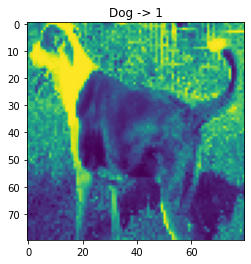

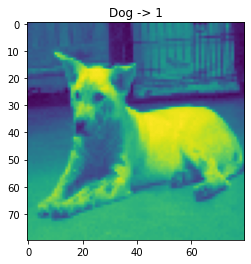

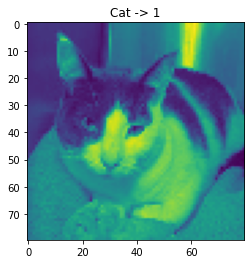

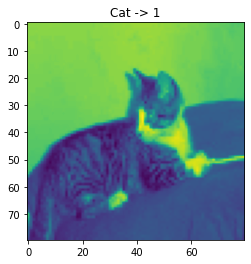

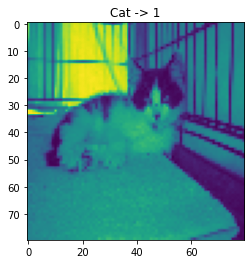

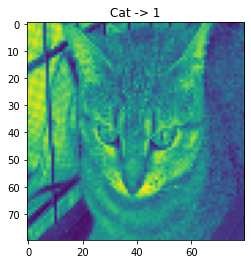

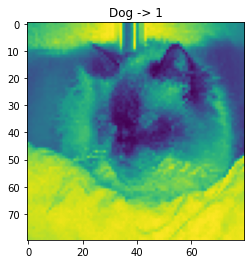

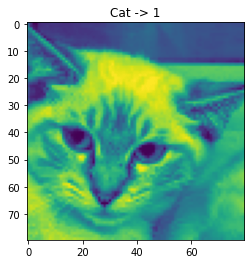

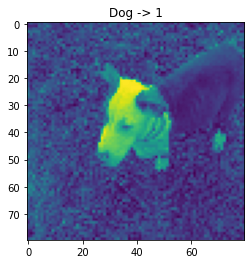

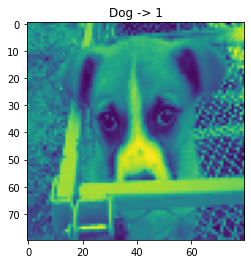

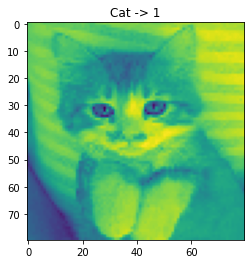

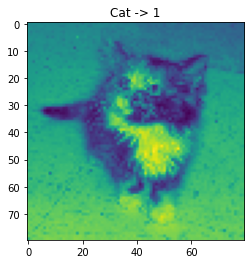

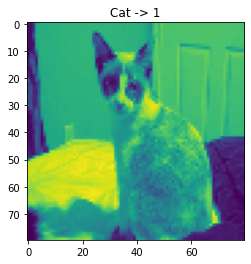

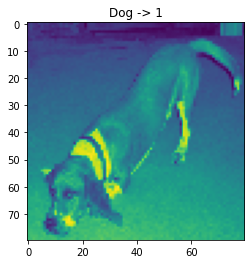

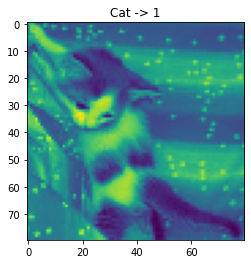

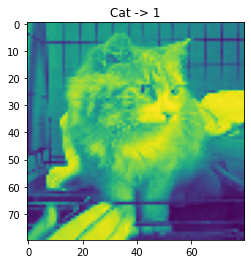

In [85]:
for i in range(8, 24):
    if(predicted_val[i] == 0):
        plt.figure()
        plt.imshow(test_data[i])
        plt.title("Dog -> 1")
    else:
        plt.figure()
        plt.imshow(test_data[i])
        plt.title("Cat -> 1")

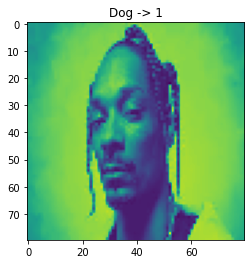

In [89]:
if(predicted_val[0] == 0):
    plt.imshow(test_data[0])
    plt.title("Dog -> 1")
else:
    plt.imshow(test_data[0])
    plt.title("Cat -> 1")

In [69]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [70]:
len(submission_df[submission_df["label"]==0])

5982

In [71]:
submission_df.to_csv("submissioncsv.csv", index=False)

NETWORK CART CURT

conv2d_input (1, 80, 80, 1) 


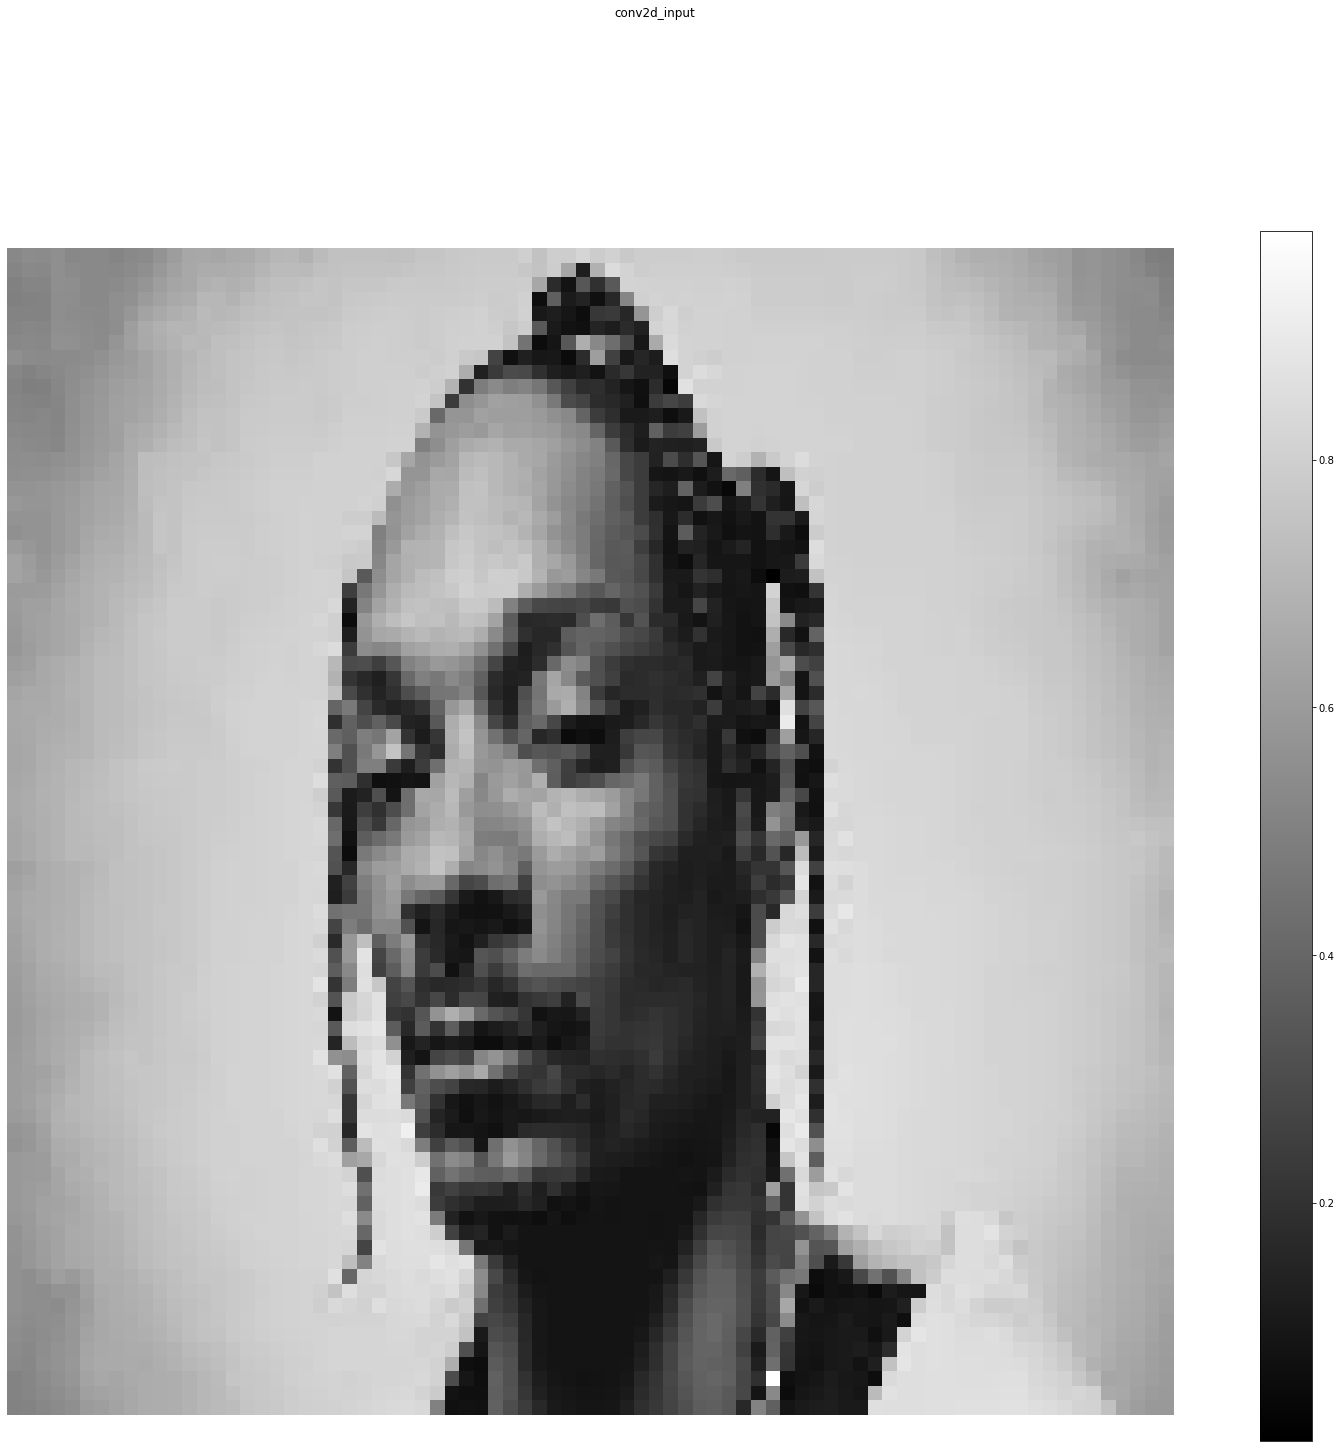

conv2d (1, 78, 78, 64) 


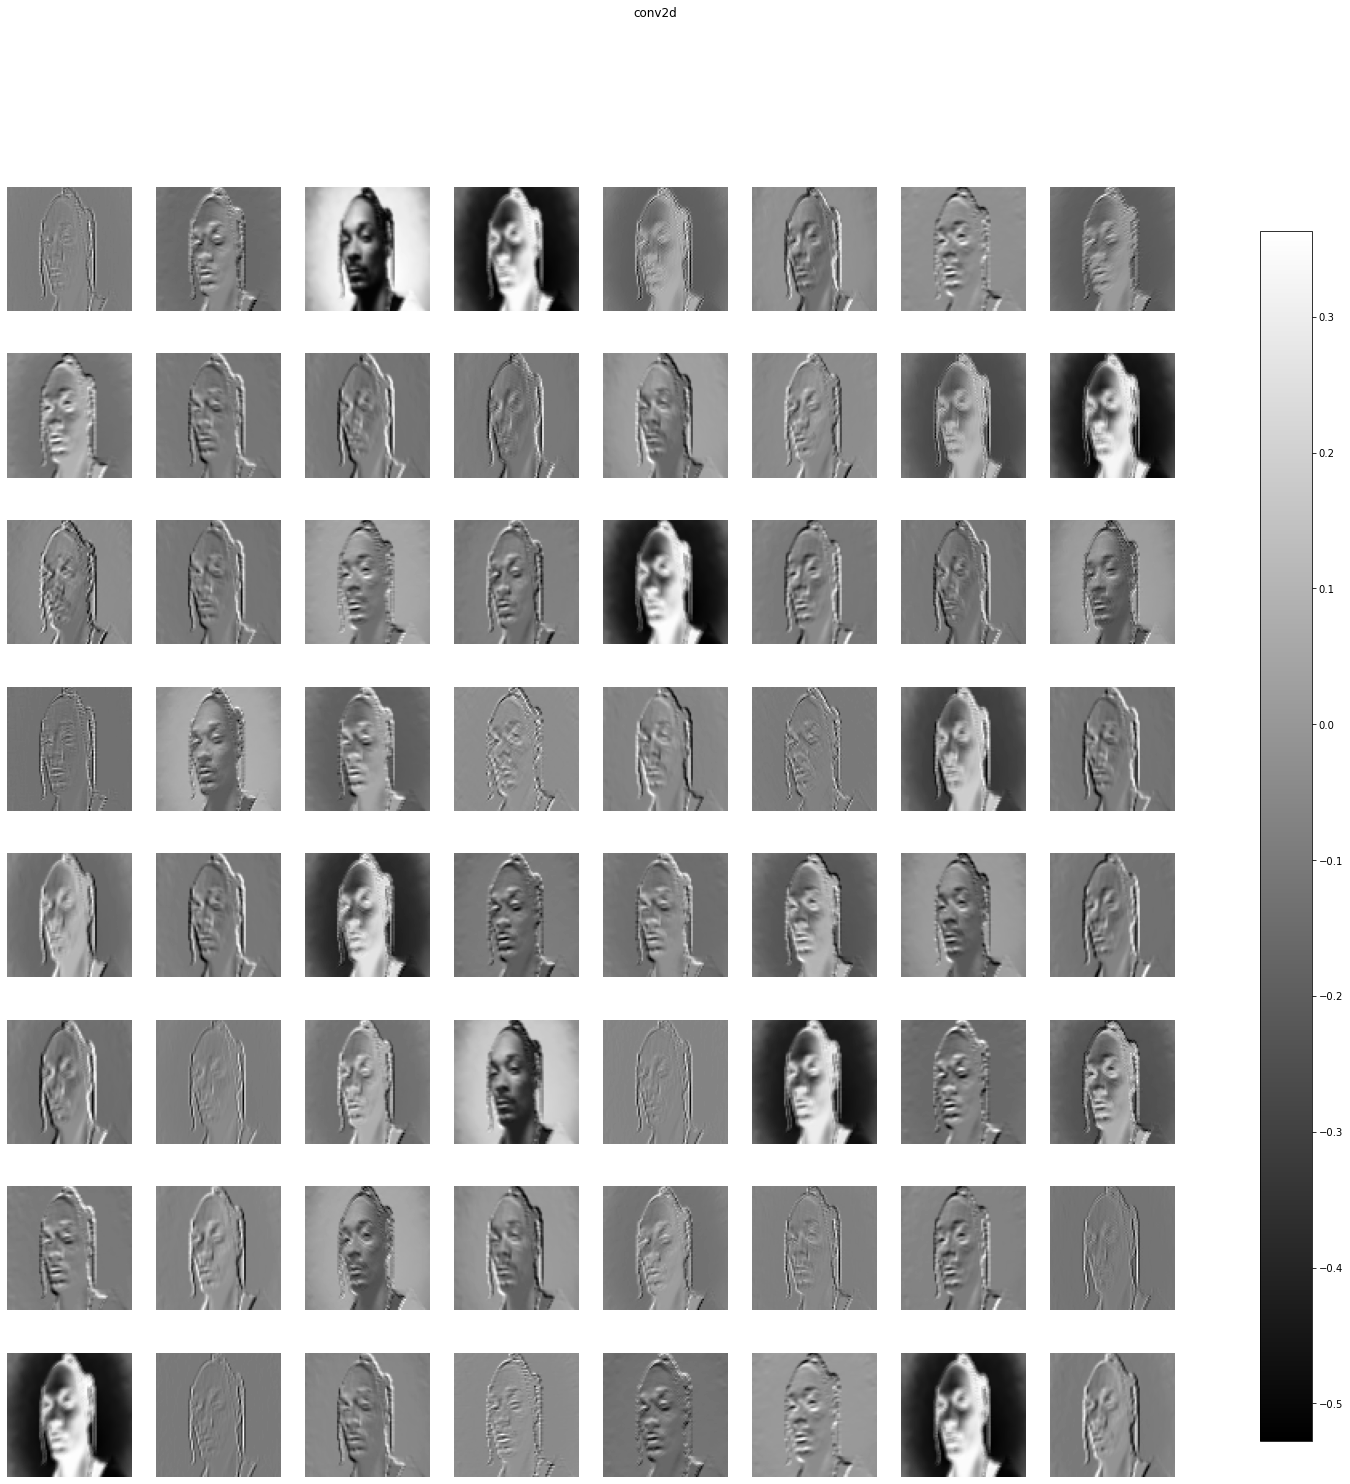

activation (1, 78, 78, 64) 


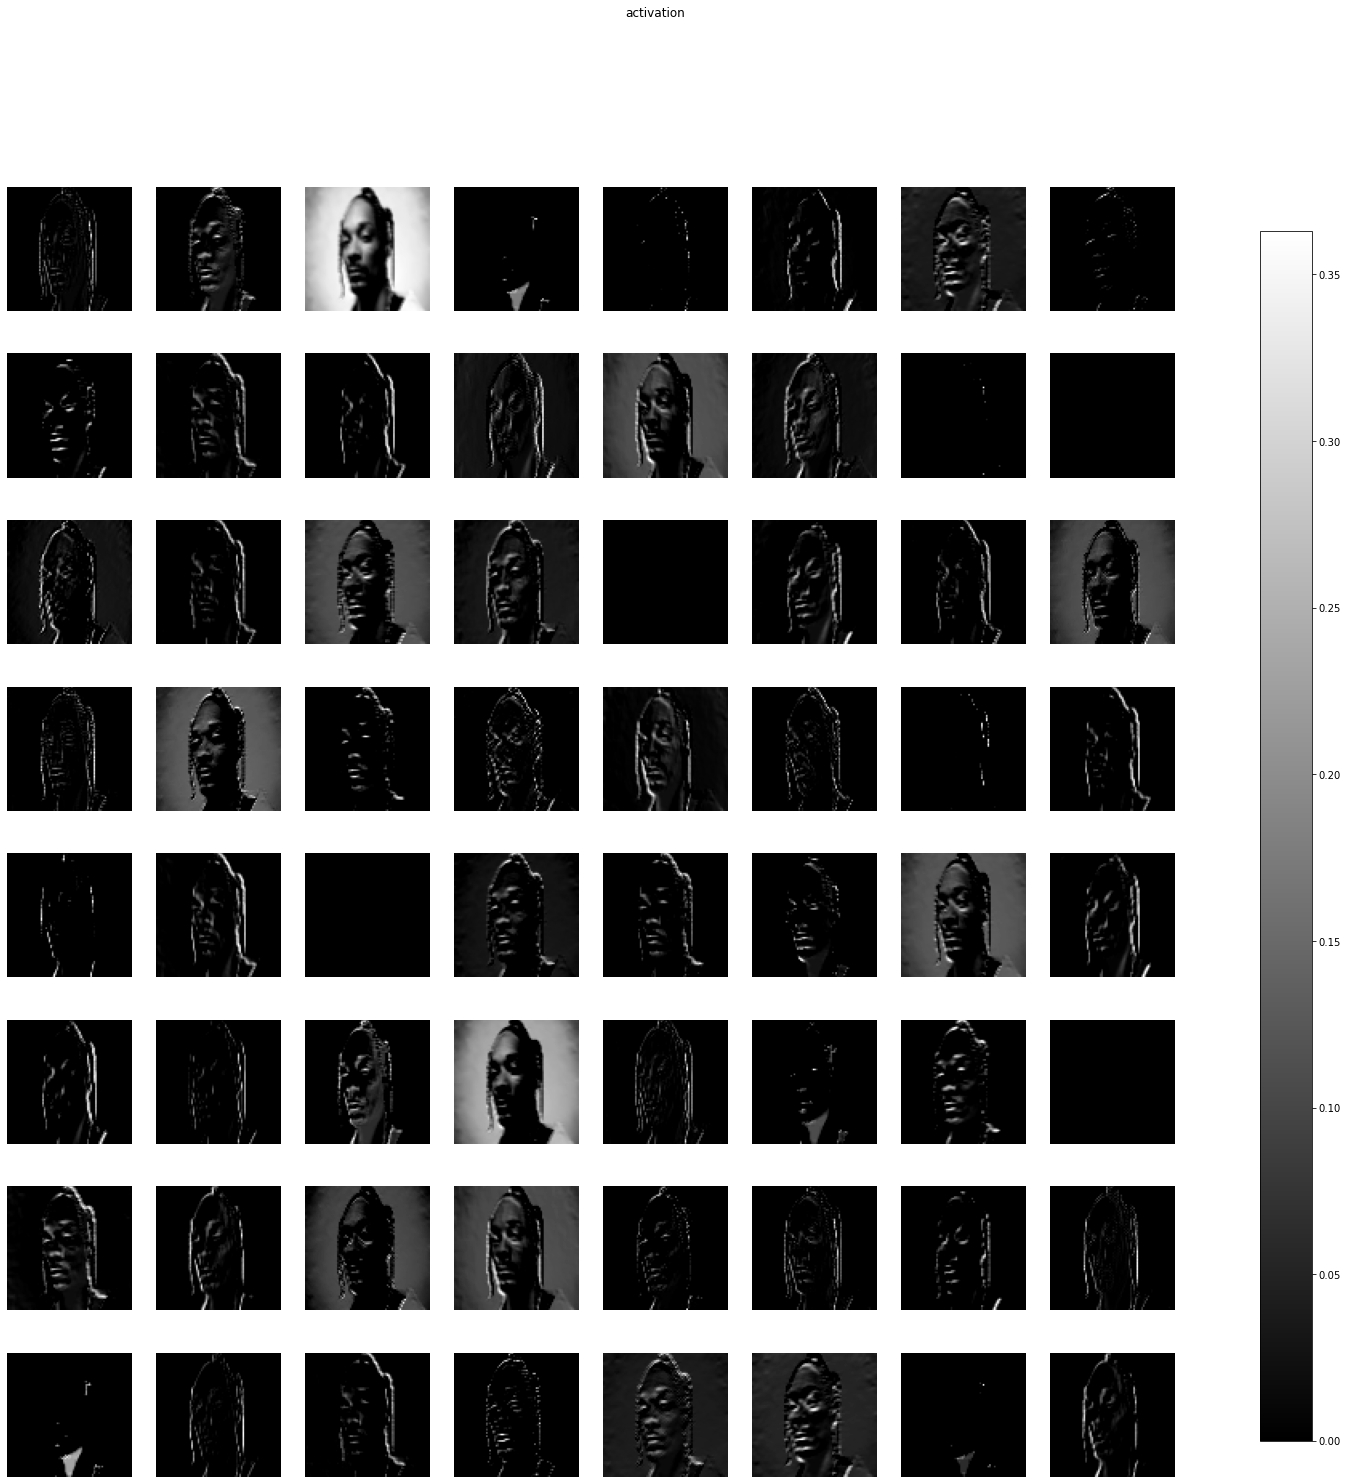

max_pooling2d (1, 39, 39, 64) 


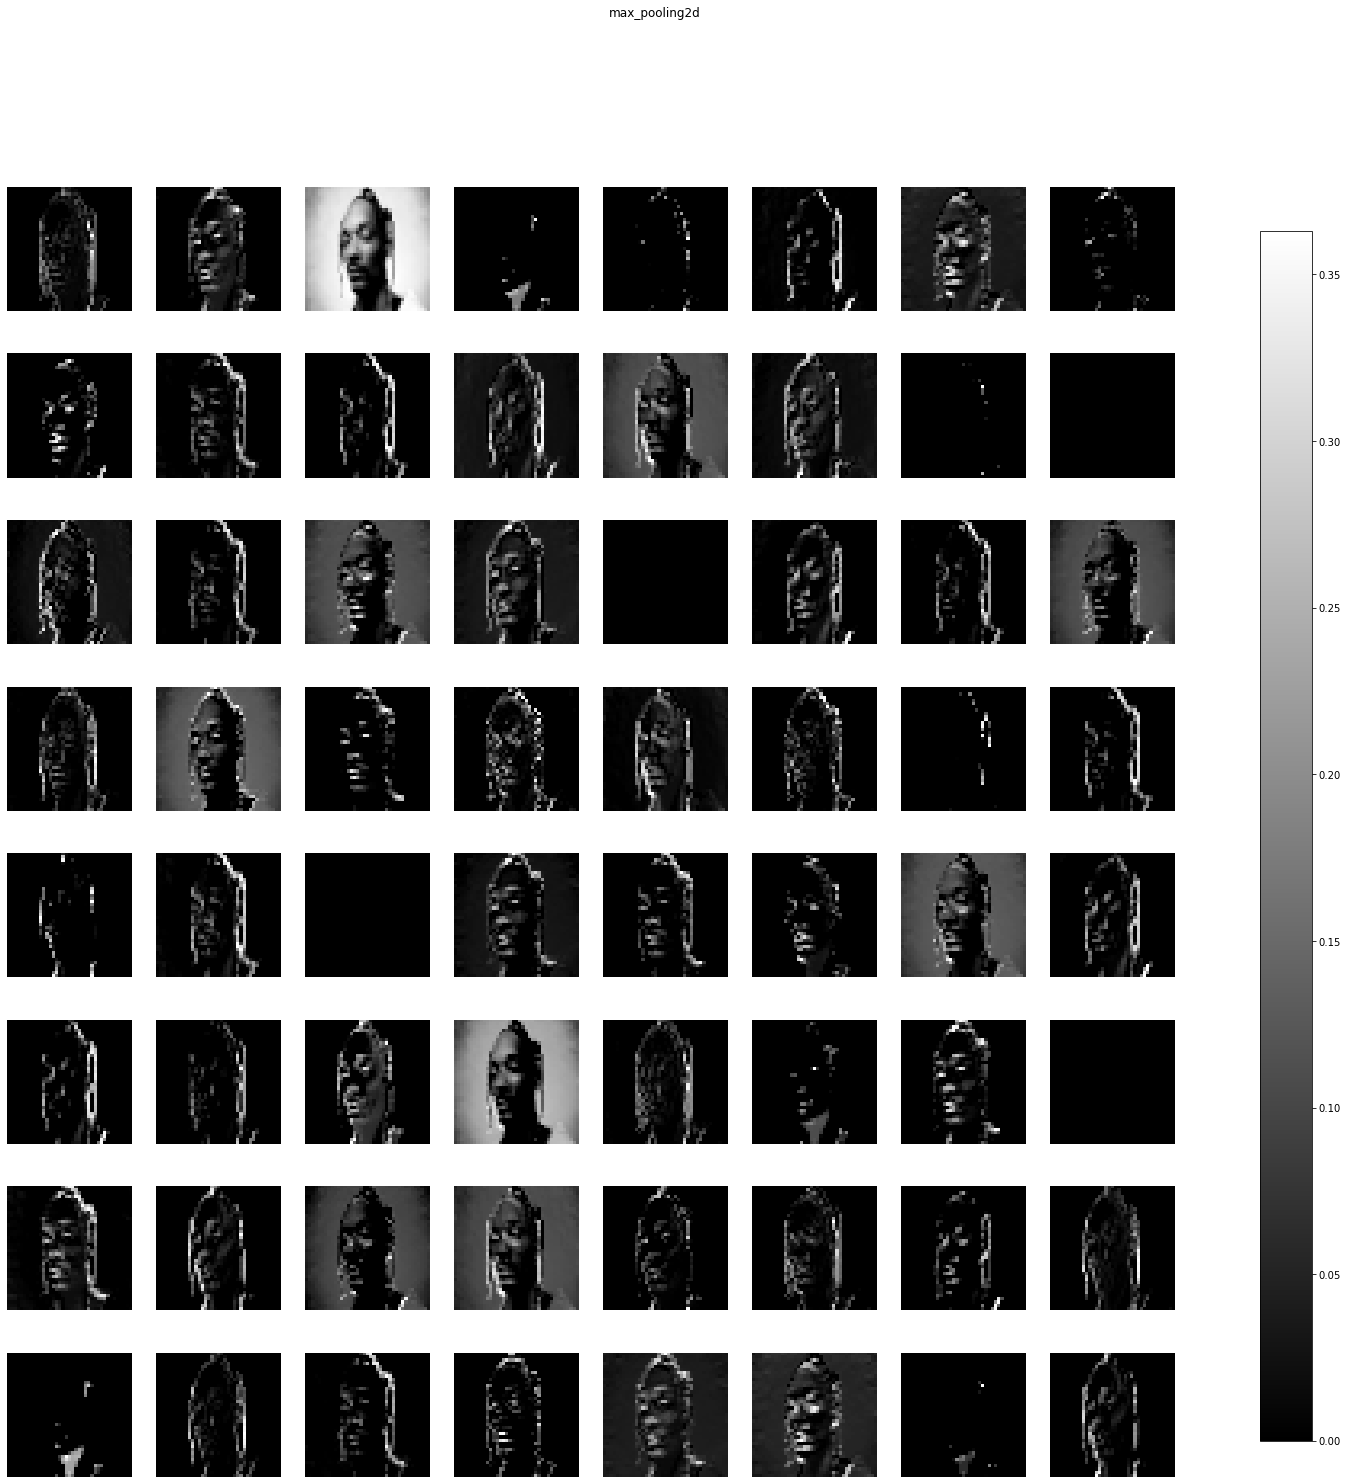

conv2d_1 (1, 37, 37, 64) 


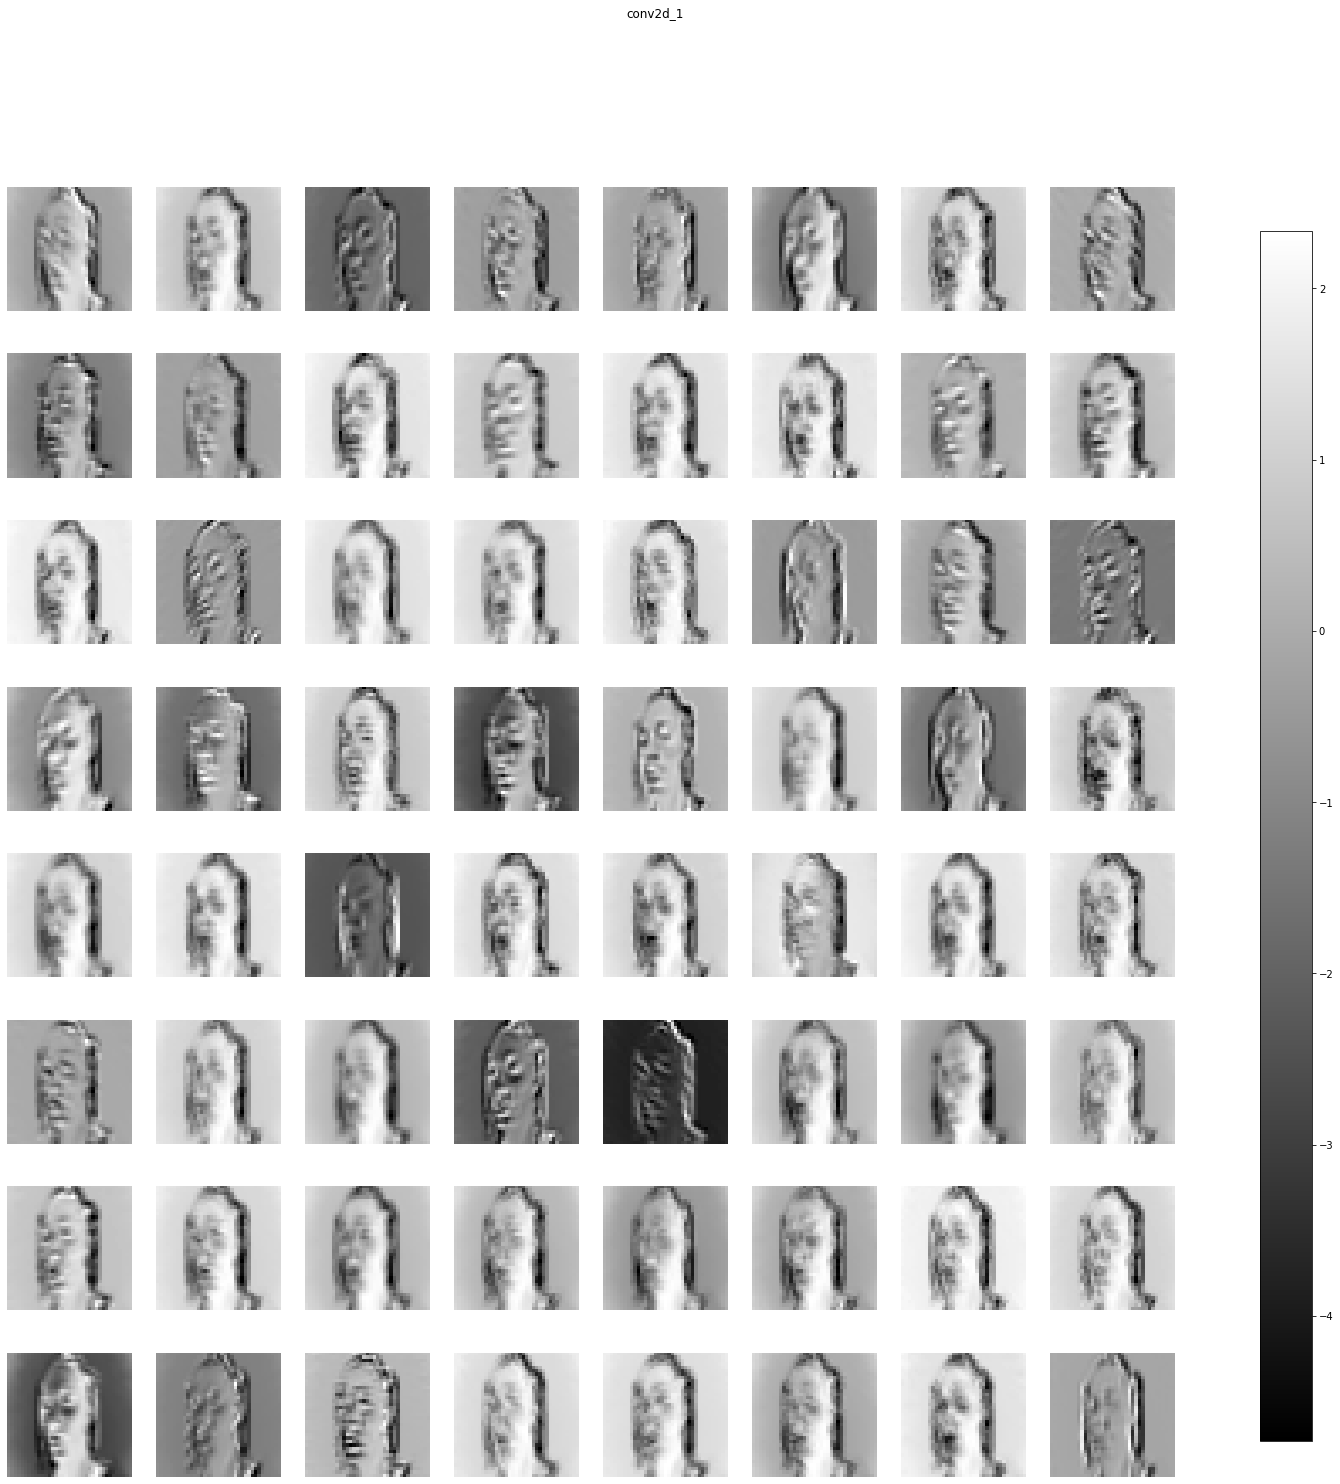

activation_1 (1, 37, 37, 64) 


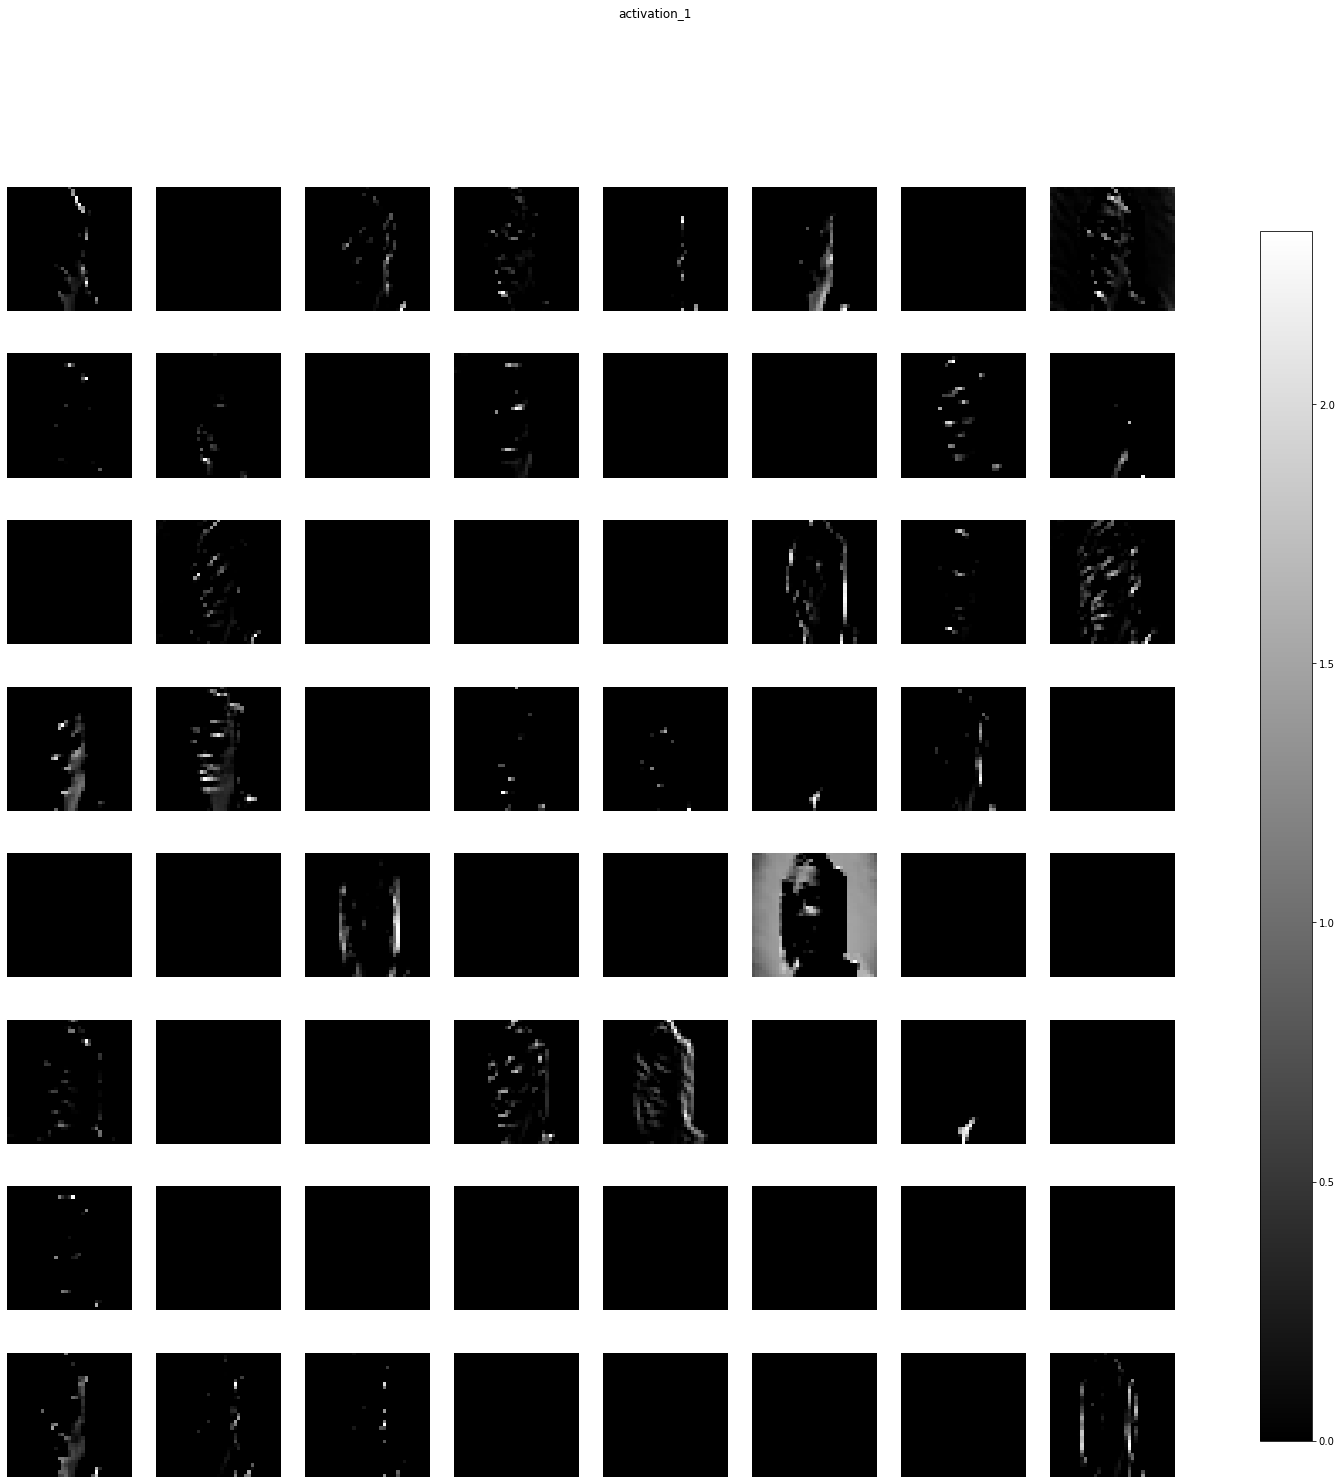

max_pooling2d_1 (1, 18, 18, 64) 


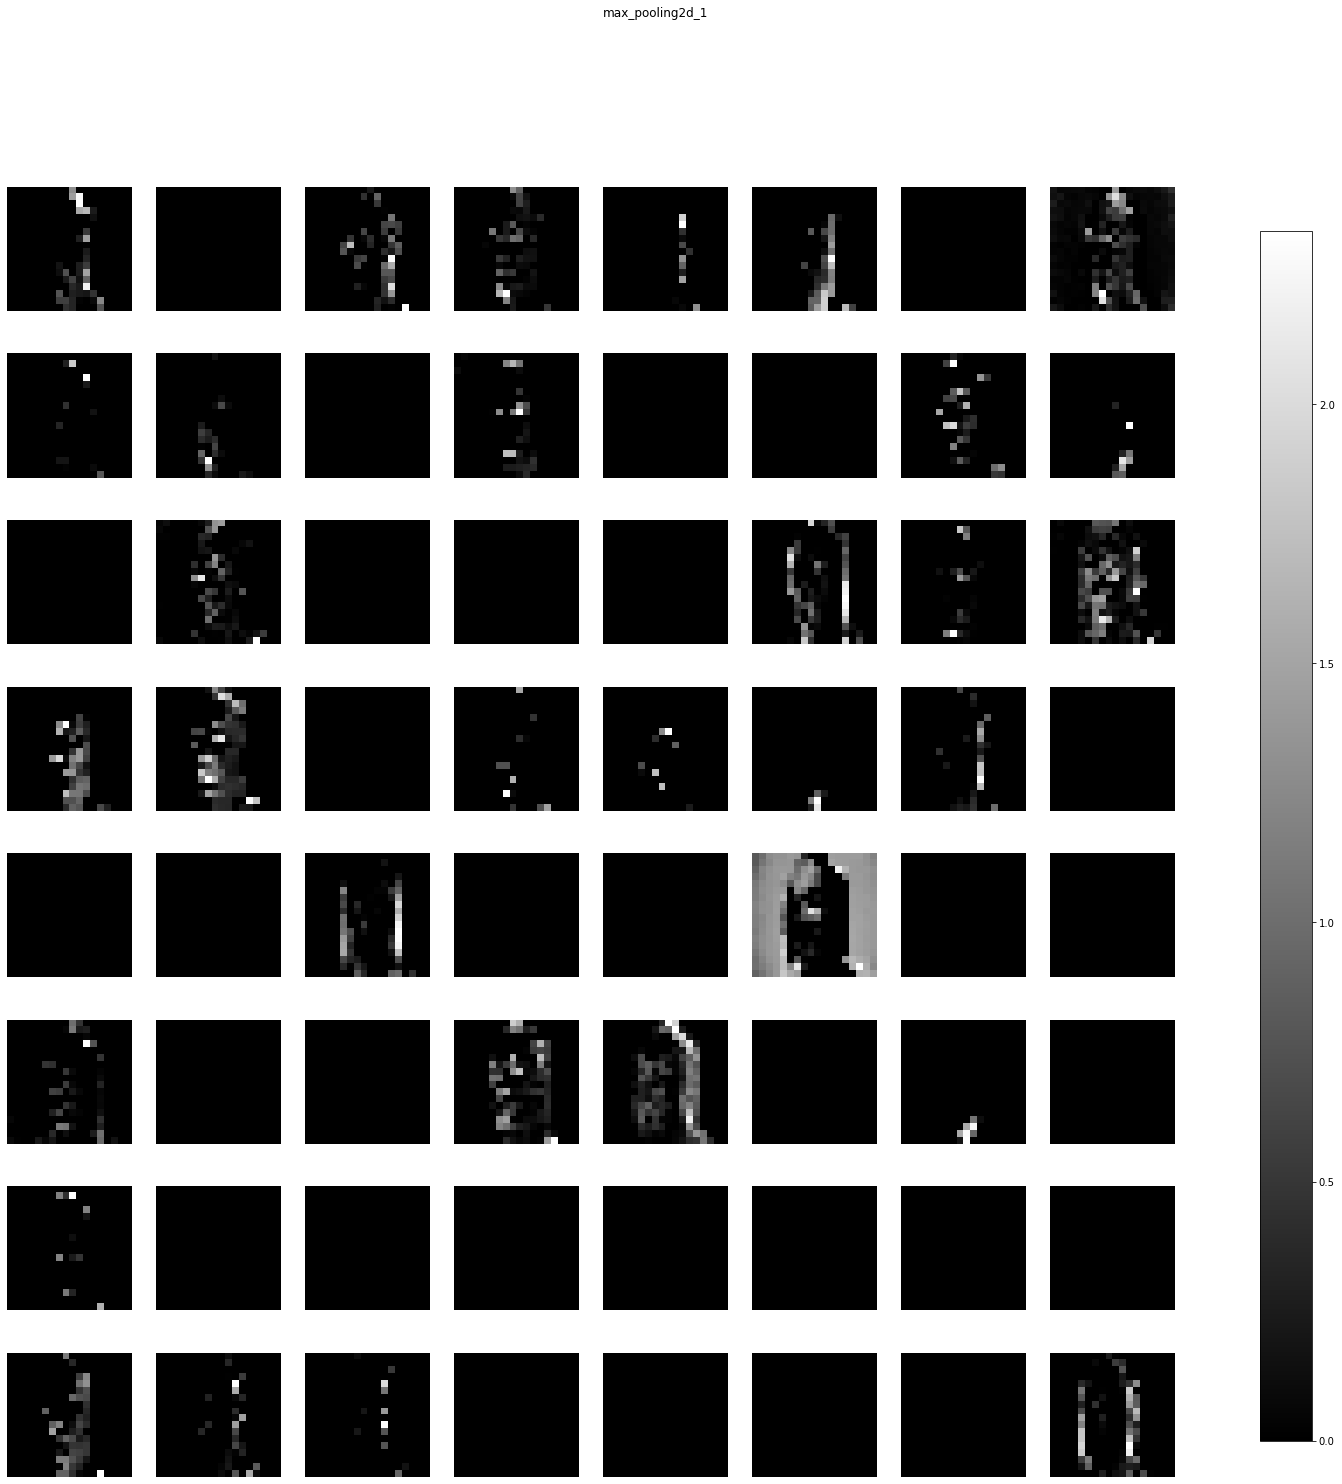

flatten (1, 20736) 


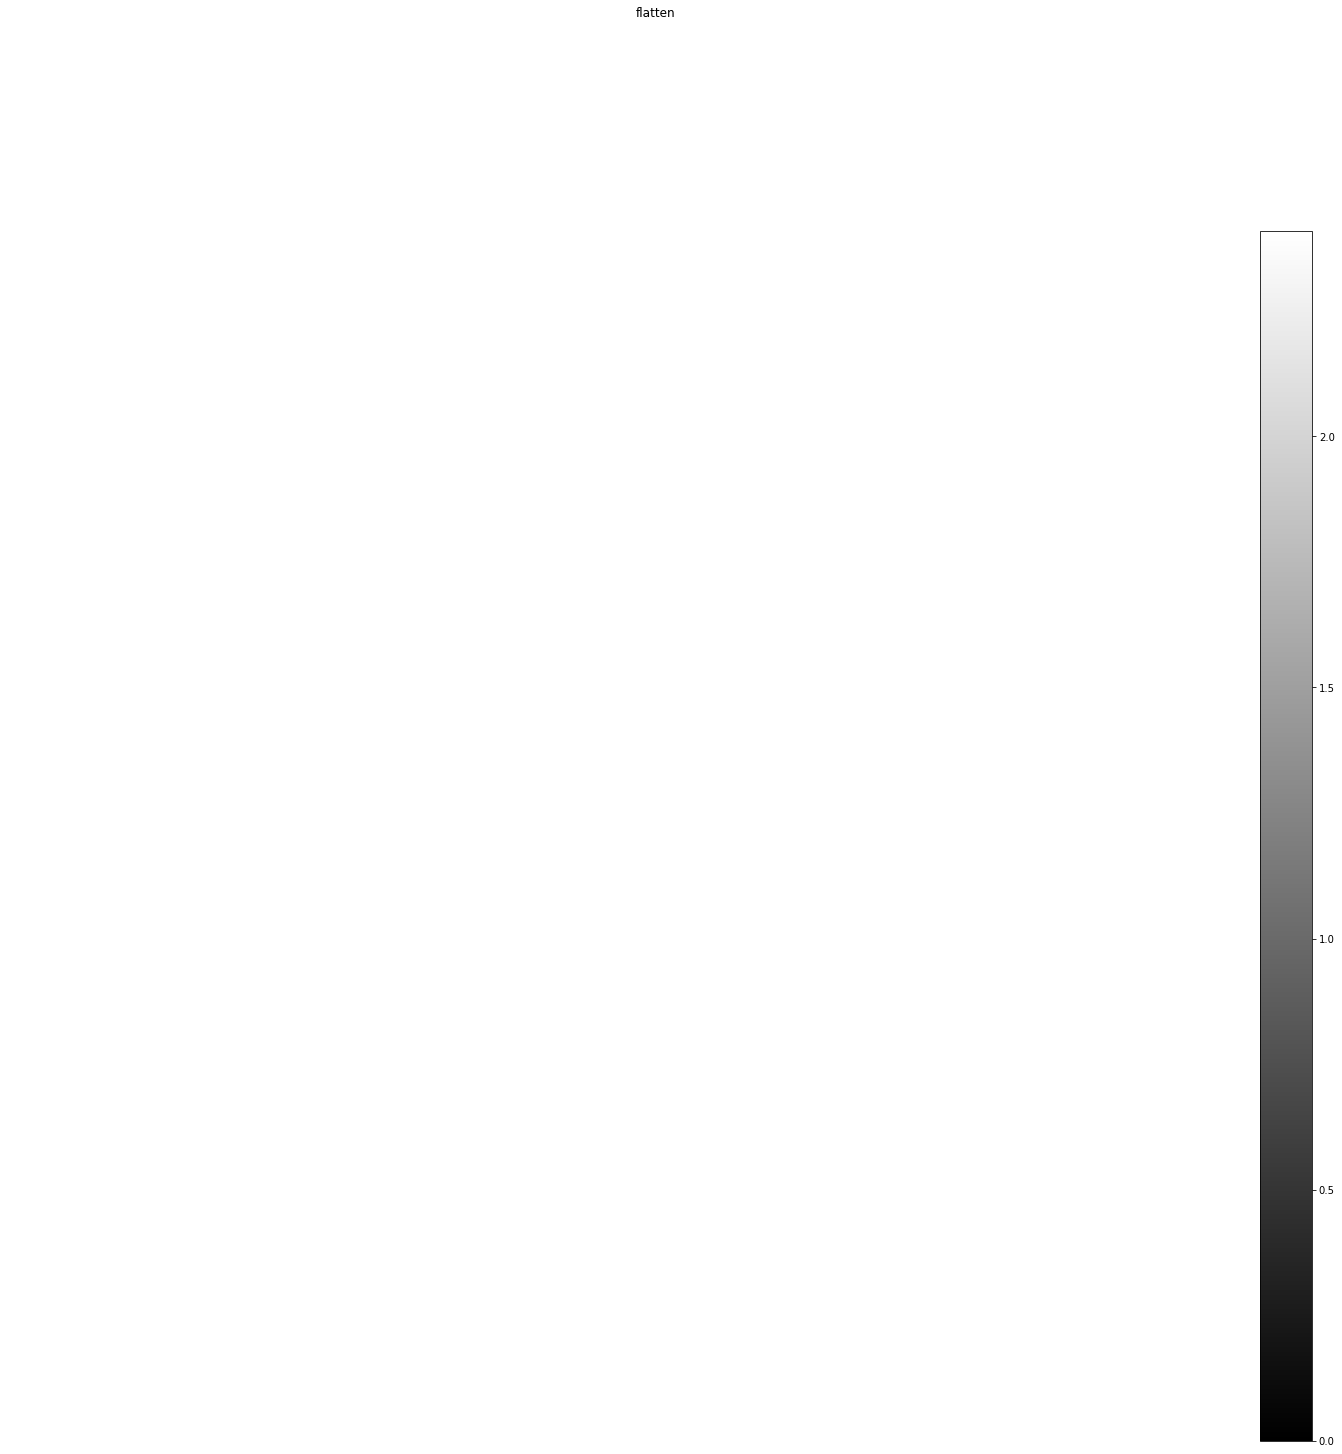

dense (1, 64) 


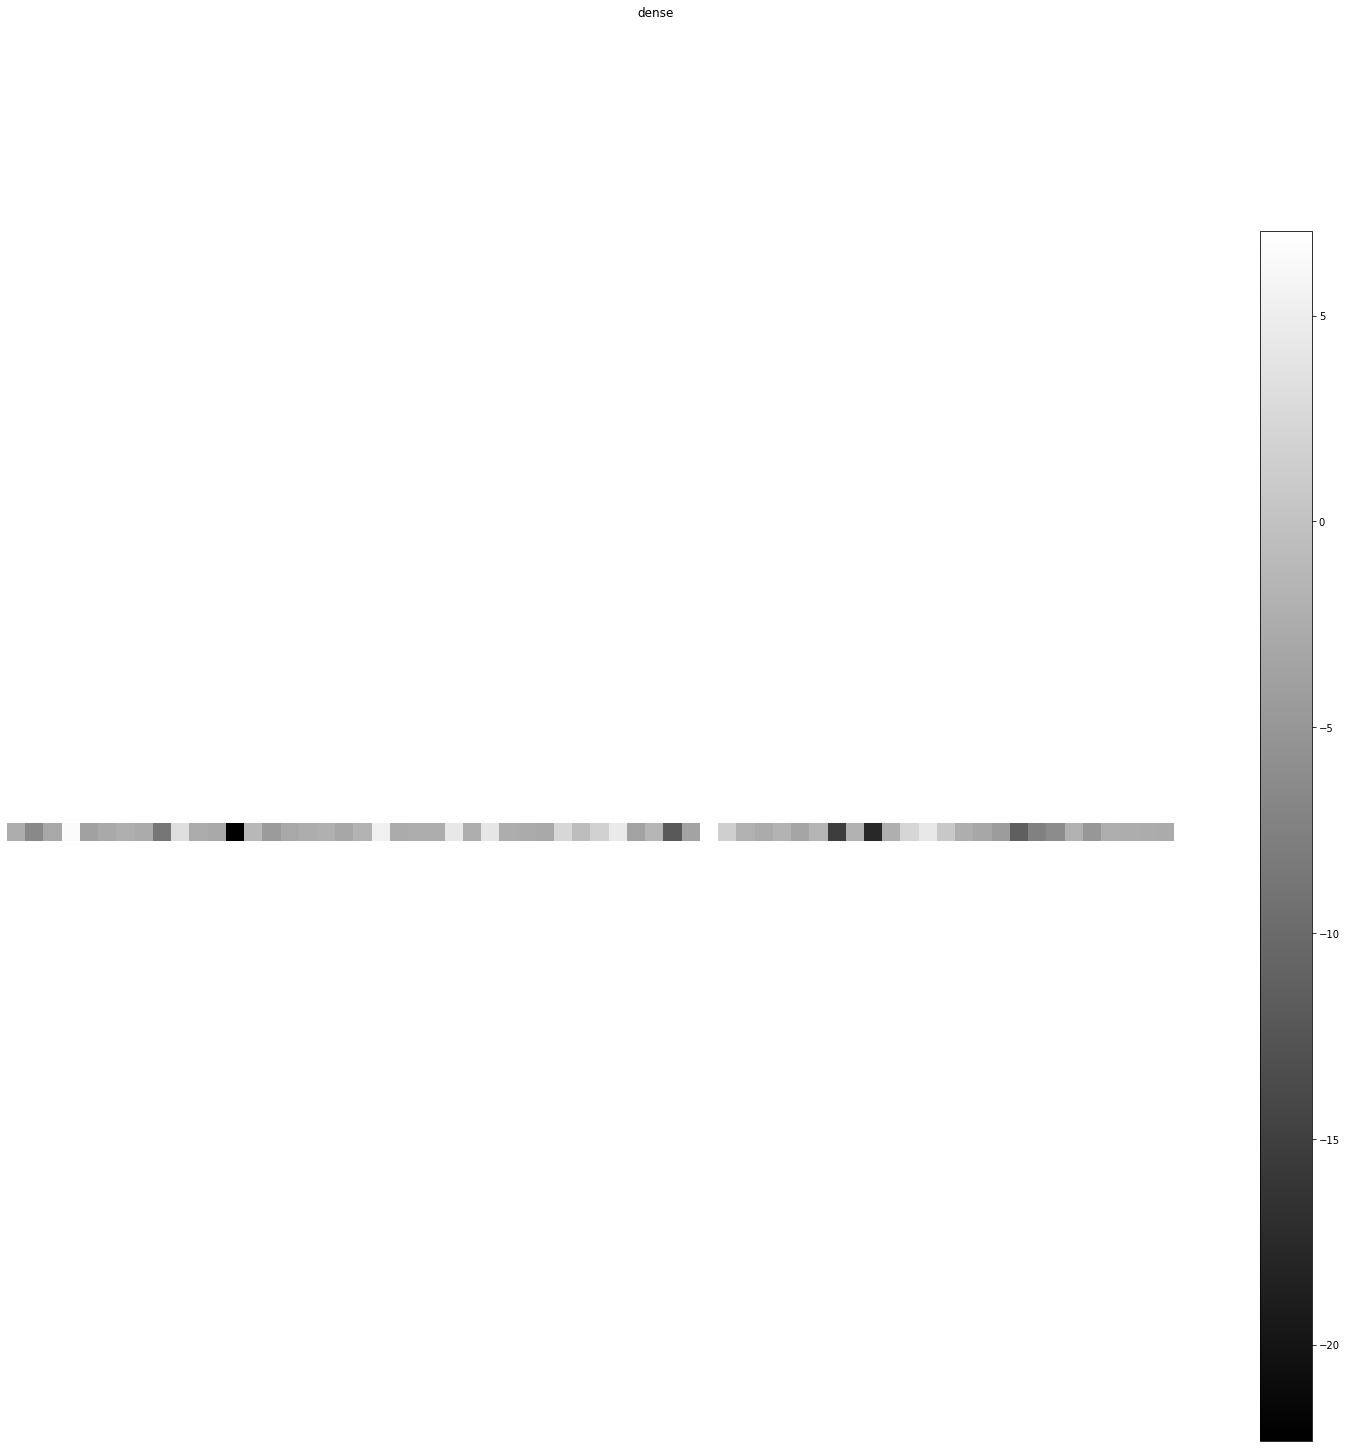

activation_2 (1, 64) 


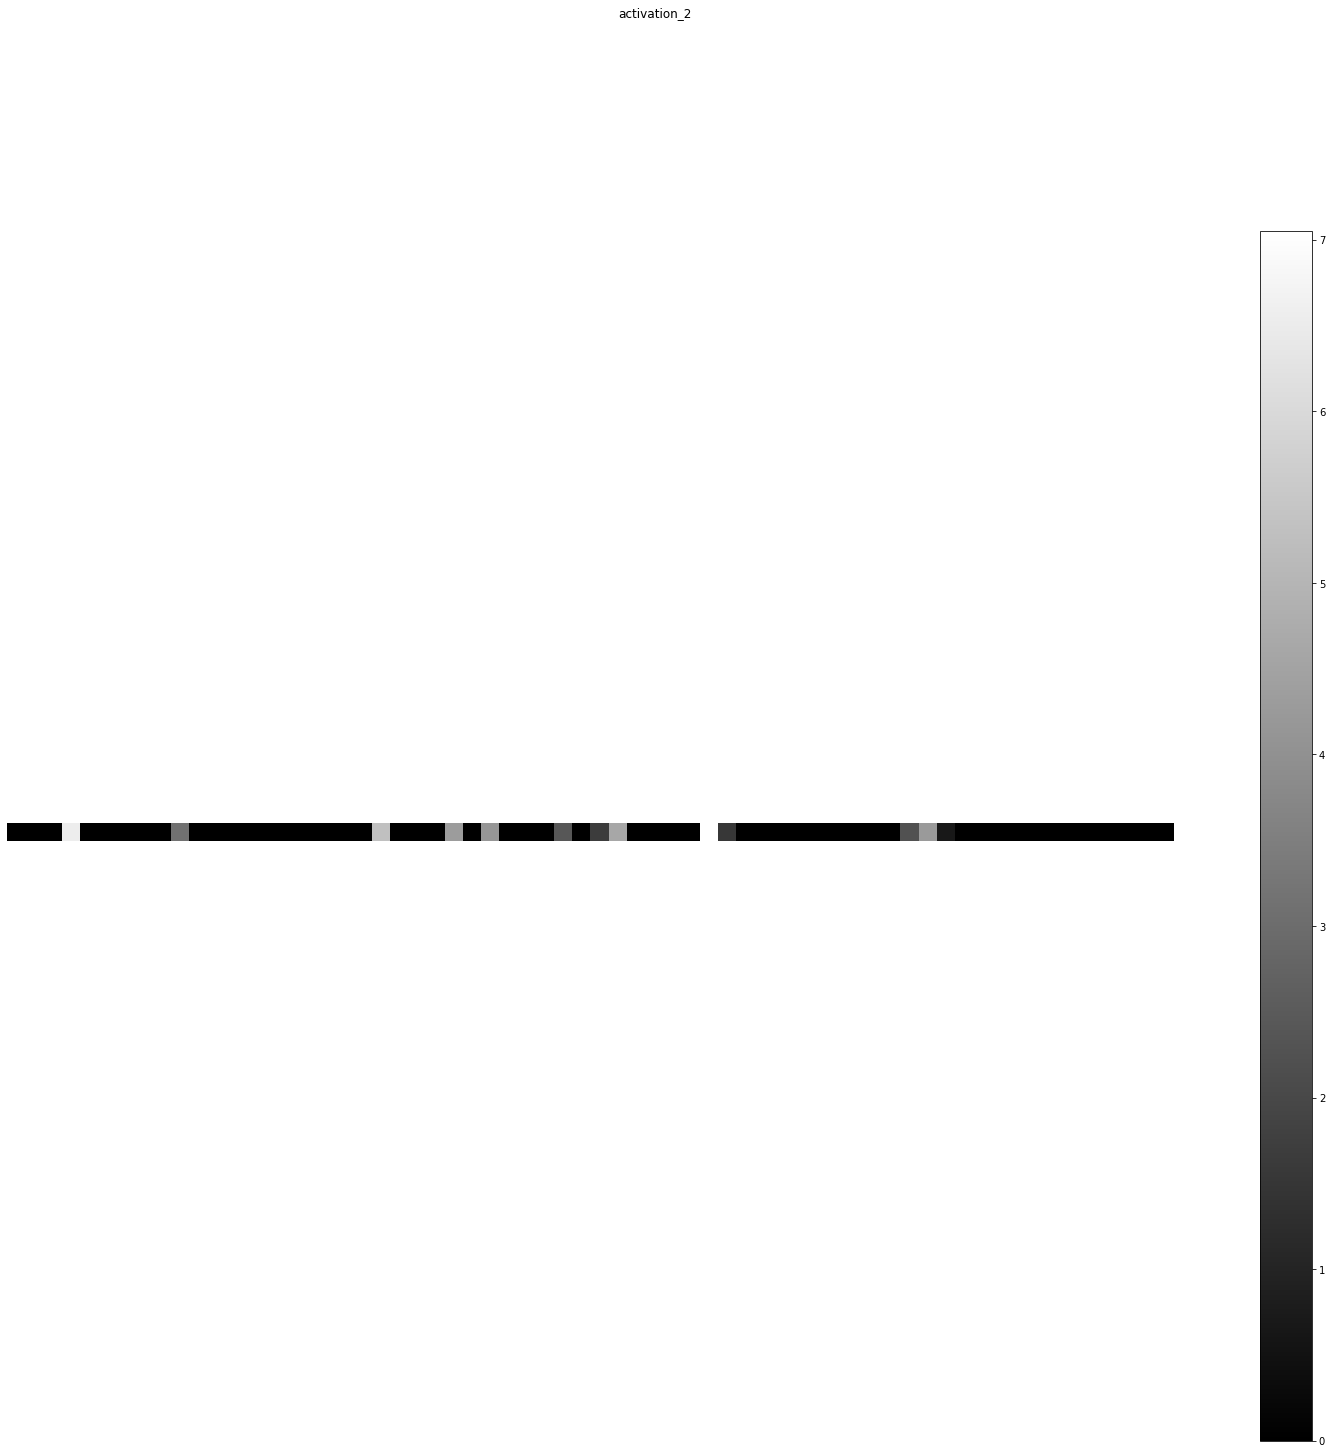

dense_1 (1, 1) 


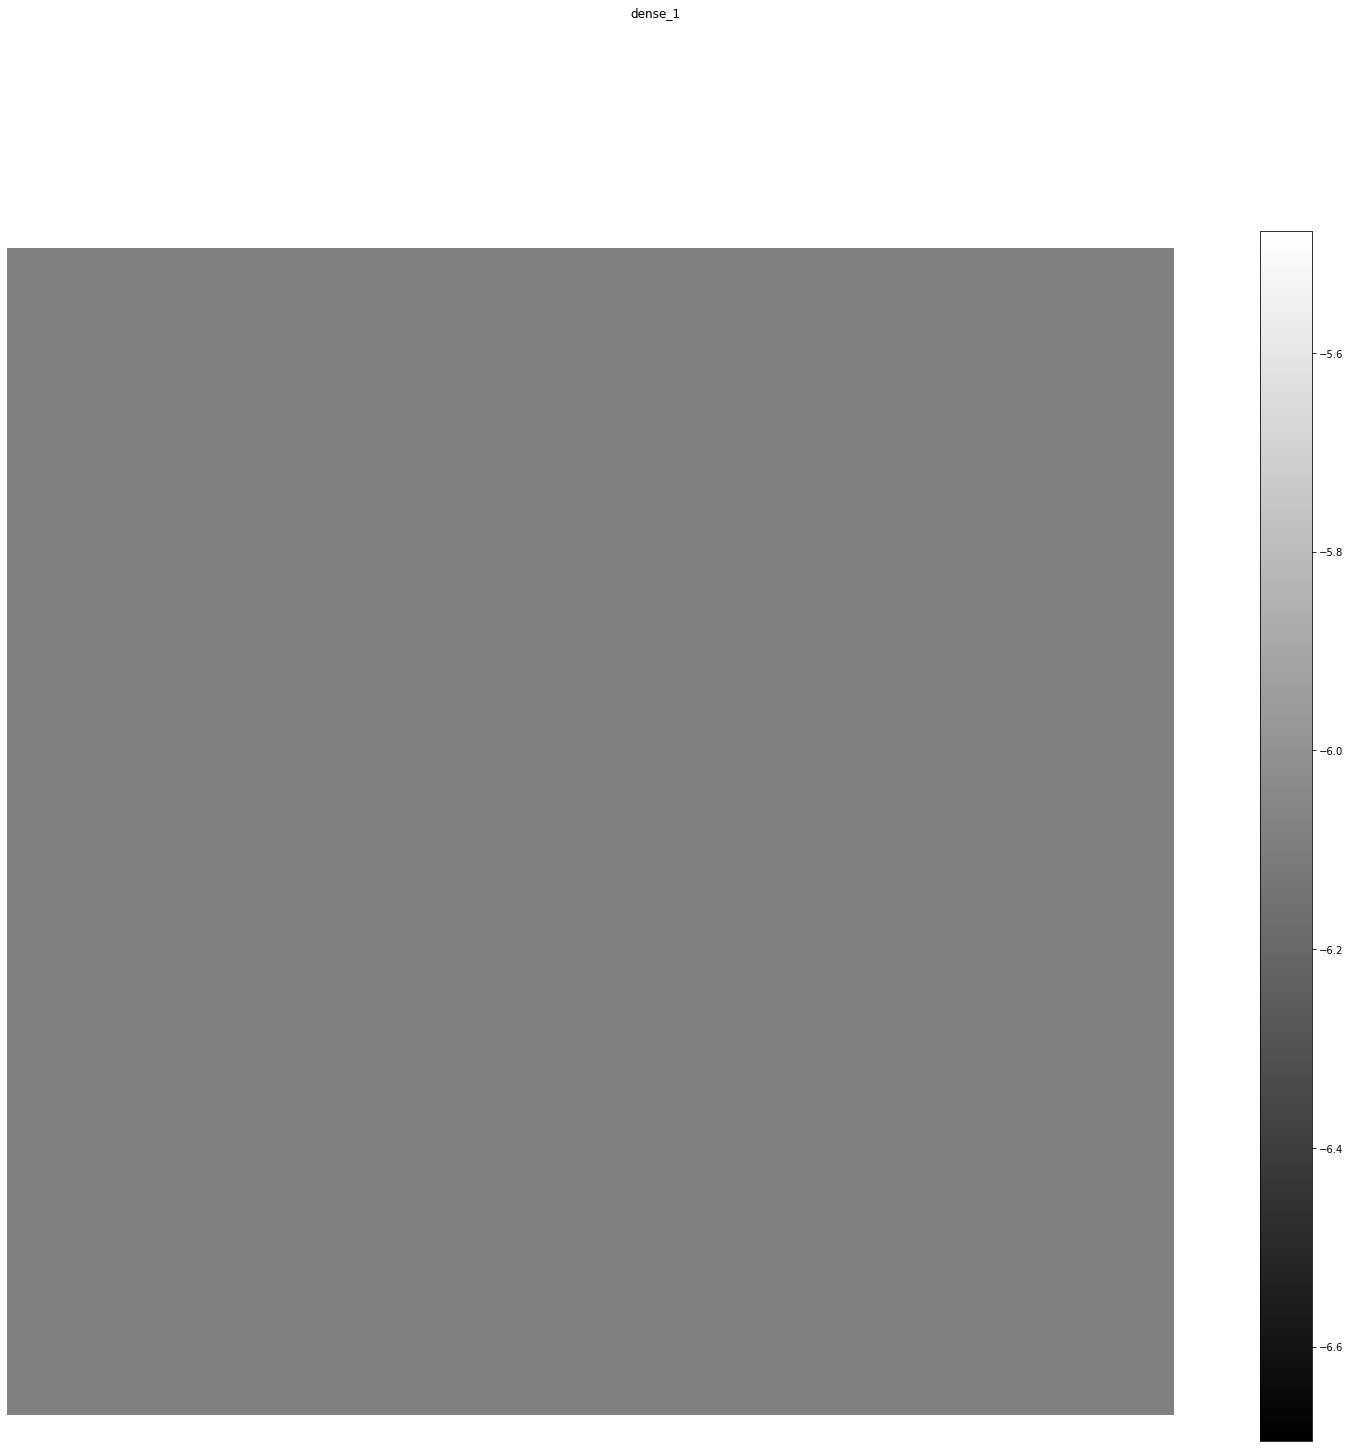

activation_3 (1, 1) 


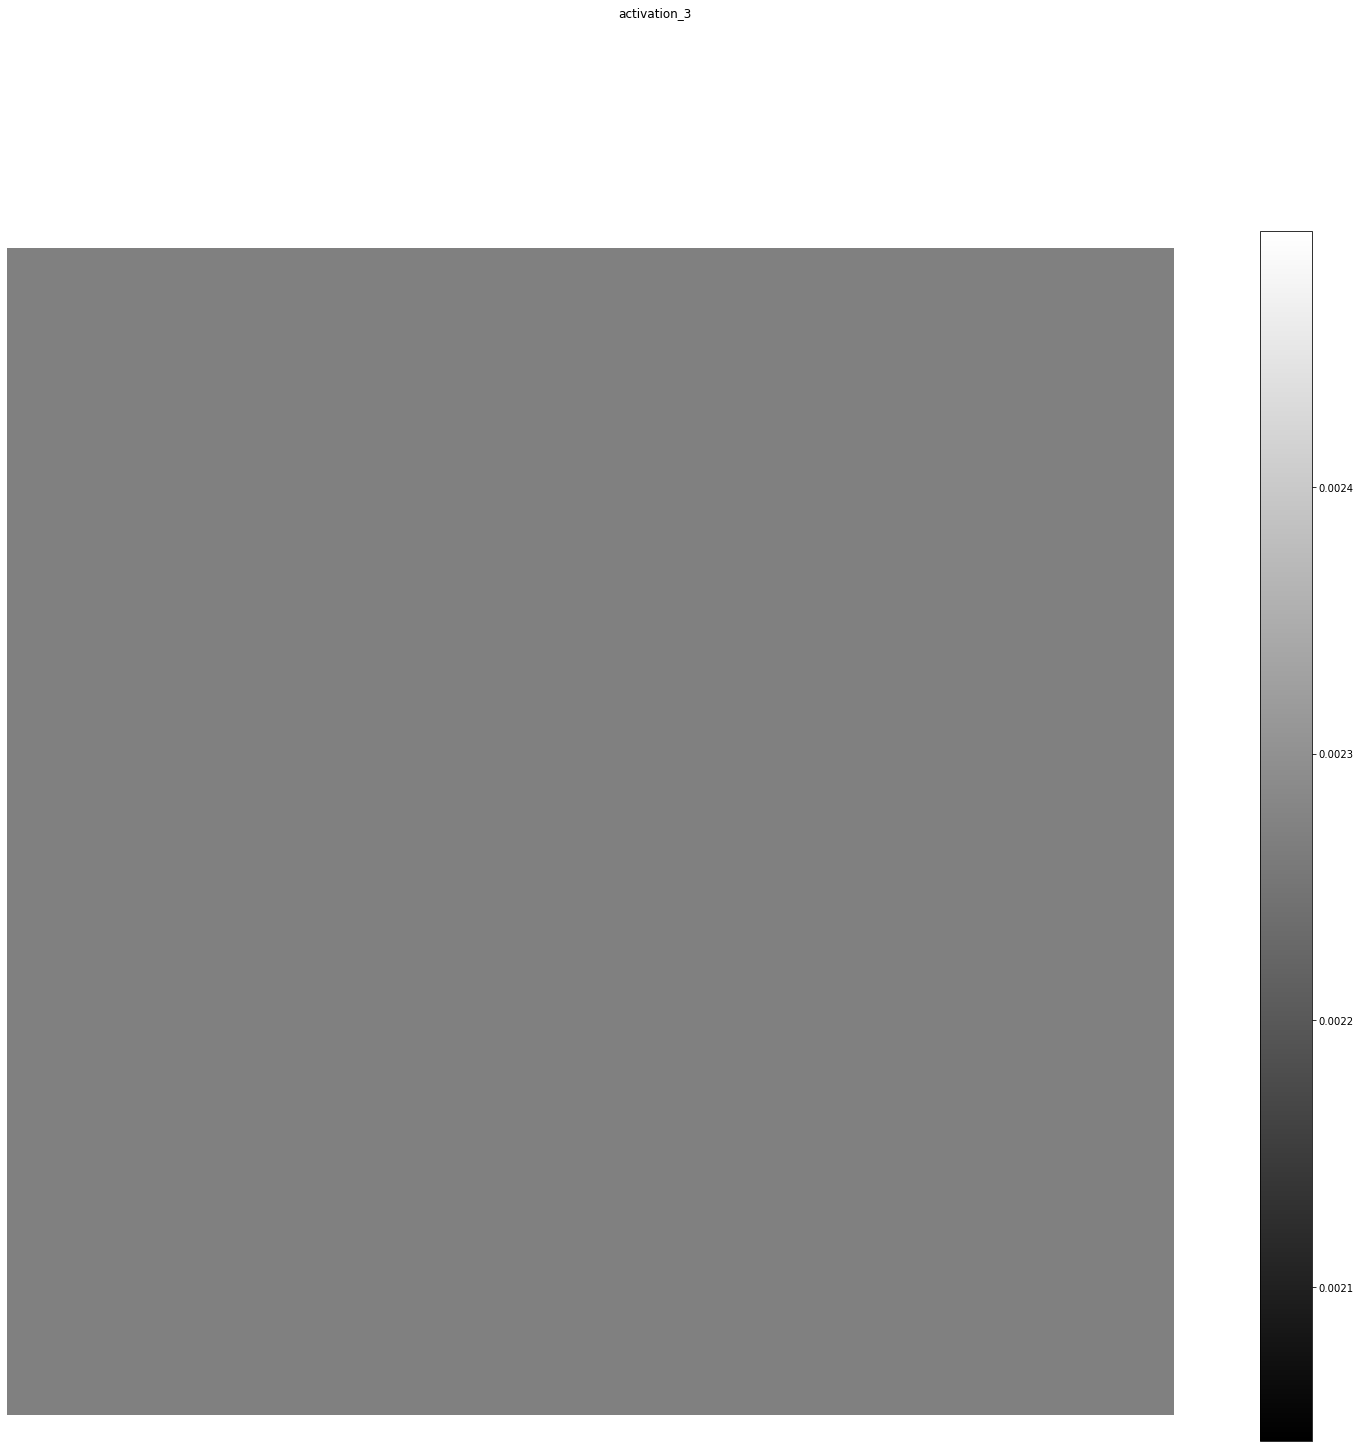

In [72]:
from keract import get_activations, display_activations
keract_inputs = test_data[0:1]
keract_targets = test_data[0:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [ ]:
#https://www.kaggle.com/c/dogs-vs-cats/data?select=test1.zip